# General Linear Least Squares

The _linear_ in linear least squares refers to how the parameters appear in the fitting function, $Y$.  So something of the form:

$$Y(x; \{a_j\}) = \sum_{j=1}^M a_j \varphi_j(x)$$

is still linear in the $\{a_j\}$, even if the _basis functions_ $\{\varphi_j\}$ are nonlinear.

```{admonition} Example
The fitting function:

$$Y(x; \{a_j\}) = a_1 + a_2 x + a_3 x^2$$

is linear in the fit parameters $\{ a_j\}$,  The basis functions in this case are:

\begin{align*}
\varphi_1 &= 1 \\
\varphi_2 &= x \\
\varphi_3 &= x^2
\end{align*}

We can apply the same technique we just did for fitting to a line for this general case.
```

```{admonition} Reference
The discussion in Garcia, _Numerical Methods for Physics_, gives a nice overview, which we loosely follow here.
```

Our $\chi^2$ is:

$$\chi^2(\{a_j\}) = \sum_{i=1}^N \frac{(Y(x_i; \{a_j\}) - y_i)^2}{\sigma_i^2} =
\sum_{i=1}^N \frac{1}{\sigma_i^2} \left [\left (\sum_{j=1}^M a_j \varphi_j(x_i)\right ) - y_i \right ]^2$$

We can differentiate it with respect to one of the parameters, $a_k$:

\begin{align*}
\frac{\partial \chi^2}{\partial a_k} 
    &= \frac{\partial}{\partial a_k} 
          \sum_{i=1}^N \frac{1}{\sigma_i^2} \left [\left (\sum_{j=1}^M a_j \varphi_j(x_i)\right ) - y_i \right ]^2 \\
    &= \sum_{i=1}^N \frac{1}{\sigma_i^2} 
          \frac{\partial}{\partial a_k} \left [\left (\sum_{j=1}^M a_j \varphi_j(x_i)\right ) - y_i \right ]^2 \\
    &= 2 \sum_{i=1}^N \frac{1}{\sigma_i^2} \left [\left (\sum_{j=1}^M a_j \varphi_j(x_i)\right ) - y_i \right ] \varphi_k(x_i) = 0
\end{align*}

We can now rewrite this as:

$$\sum_{i=1}^N \sum_{j=1}^M a_j \frac{\varphi_j(x_i) \varphi_k(x_i)}{\sigma_i^2} = \sum_{i=1}^N \frac{y_i \varphi_k(x_i)}{\sigma_i^2}$$

We define the $N\times M$ [_design matrix_](https://en.wikipedia.org/wiki/Design_matrix) as

$$A_{ij} = \frac{\varphi_j(x_i)}{\sigma_i}$$

and the source as:

$$b_i = \frac{y_i}{\sigma_i}$$

our system is:

$$\sum_{i=1}^N \sum_{j=1}^M A_{ik} A_{ij} a_j = \sum_{i=1}^N A_{ik} b_i$$

which, by looking at which indices contract, gives us the linear system:

$${\bf A}^\intercal {\bf A} {\bf a} = {\bf A}^\intercal {\bf b}$$

where ${\bf A}^\intercal {\bf A}$ is an $M\times M$ matrix.

The procedure we described above is sometimes called [_ordinary least squares_](https://en.wikipedia.org/wiki/Ordinary_least_squares).

## Linear fit revisited

For a linear fit,

$$Y(x) = a_1 + a_2 x$$

and our basis functions are: $\phi_1 = 1$ and $\phi_2 = x$.

### Design matrix and source

Our design matrix in this case is:

$${\bf A} = \left ( \begin{array}{cc}
                1/\sigma_1 & x_1 / \sigma_1 \\
                1/\sigma_2 & x_2 / \sigma_2 \\
                \vdots & \vdots \\
                1/\sigma_N & x_N / \sigma_N \\
               \end{array}\right )$$

and the source is:

$${\bf b} = \left (\begin{array}{c} y_1 / \sigma_1 \\
                                    y_2 / \sigma_2 \\
                                    \vdots
                                    y_N / \sigma_N \end{array} \right )$$ 

### Linear system

${\bf A}^\intercal {\bf A}$ is:

\begin{align*}
{\bf A}^\intercal{\bf A} &= \left ( \begin{array}{cccc}
                            1/\sigma_1 & 1/\sigma_2 & \cdots & 1/\sigma_N \\
                            x_1/\sigma_1 & x_2/\sigma_2 & \cdots & x_N/\sigma_N \end{array} \right )
                            \left ( \begin{array}{cc}
                1/\sigma_1 & x_1 / \sigma_1 \\
                1/\sigma_2 & x_2 / \sigma_2 \\
                \vdots & \vdots \\
                1/\sigma_N & x_N / \sigma_N \\
               \end{array}\right ) \\
               &= \left ( \begin{array}{cc} \sum_i 1/\sigma_i^2 & \sum_i x_i / \sigma_i^2 \\
                                           \sum_i x_i/\sigma_i^2 & \sum_i x_i^2 / \sigma_i^2 \end{array} \right )
\end{align*}

and ${\bf A}^\intercal {\bf A} {\bf a}$ is:

\begin{align*}
{\bf A}^\intercal {\bf A} {\bf a} &= 
   \left ( \begin{array}{cc} \sum_i 1/\sigma_i^2 & \sum_i x_i / \sigma_i^2 \\
                             \sum_i x_i/\sigma_i^2 & \sum_i x_i^2 / \sigma_i^2 \end{array} \right )
   \left ( \begin{array}{c} a_1 \\ a_2 \end{array} \right ) \\
   &= \left ( \begin{array}{c} a_1 \sum_i 1/\sigma_i^2 + a_2 \sum_i x_i/\sigma_i^2 \\
                               a_1 \sum_i x_i/\sigma_i^2 + a_2 \sum_i x_i^2 /\sigma_i^2 \end{array} \right )
                               \end{align*}


${\bf A}^\intercal {\bf b}$ is:

\begin{align*}
{\bf A}^\intercal {\bf b} &= \left ( \begin{array}{cccc}
                            1/\sigma_1 & 1/\sigma_2 & \cdots & 1/\sigma_N \\
                            x_1/\sigma_1 & x_2/\sigma_2 & \cdots & x_N/\sigma_N \end{array} \right )
           \left ( \begin{array}{c}
                y_1 / \sigma_1 \\
                y_2 / \sigma_2 \\
                \vdots \\
                y_N / \sigma_N \\
               \end{array}\right ) \\
               &= \left ( \begin{array}{c} \sum_i y_i / \sigma_i^2 \\
                                           \sum_i x_i y_i / \sigma_i^2 \end{array} \right )
\end{align*}

Finally, this gives us 2 equations with 2 unknowns ($a_1$, $a_2$):

\begin{align*}
a_1 \sum_i \frac{1}{\sigma_i^2} + a_2 \sum_i \frac{x_i}{\sigma_i^2} &= \sum_i \frac{y_i}{\sigma_i^2} \\
a_1 \sum_i \frac{x_i}{\sigma_i^2} + a_2 \sum_i \frac{x_i^2}{\sigma_i^2} &= \sum_i \frac{x_i y_i}{\sigma_i^2} 
\end{align*}

This is precisely the system we saw before.

## Parabolic fit

Let's consider fitting to a function:

$$Y(x; \{a_j\}) = \sum_{j=1}^M a_j x^{j-1}$$

for $M = 3$, this is:

$$Y(x) = a_1 + a_2 x + a_3 x^2$$

If we have 10 data points, $x_1, \ldots, x_{10}$, then our matrix ${\bf A}$ will take the form:

$${\bf A} = \left (\begin{array}{ccc} 1/\sigma_1 & x_1/\sigma_1 & x_1^2/\sigma1 \\
                                      1/\sigma_2 & x_2/\sigma_2 & x_2^2/\sigma_2 \\
                                      \vdots & \vdots & \vdots \\
                                      1/\sigma_{10} & x_{10}/\sigma_{10} & x_{10}^2/\sigma_{10} 
                                      \end{array} \right )$$

In [25]:
import numpy as np
import matplotlib.pyplot as plt

Let's first write a function that takes an $x_i$ and returns the entries in a row of ${\bf A}$

In [26]:
def basis(x, M=3):
    """ the basis function for the fit, x**n"""
    
    j = np.arange(M)
    return x**j

Now we'll write a function that takes our data and errors and sets up the linear system ${\bf A}^\intercal {\bf A} {\bf a} = {\bf A}^\intercal {\bf b}$ and solves it.

In [27]:
def general_regression(x, y, yerr, M):
    """ here, M is the number of fitting parameters.  We will fit to
        a function that is linear in the a's, using the basis functions
        x**j """

    N = len(x)

    # construct the design matrix -- A_{ij} = Y_j(x_i)/sigma_i -- this is
    # N x M.  Each row corresponds to a single data point, x_i, y_i
    A = np.zeros((N, M), dtype=np.float64)

    for i in range(N):
        A[i,:] = basis(x[i], M) / yerr[i]

    # construct the MxM matrix for the linear system, A^T A:
    ATA = np.transpose(A) @ A

    print("condition number of A^T A:", np.linalg.cond(ATA))

    # construct the RHS
    b = np.transpose(A) @ (y / yerr)

    # solve the system
    a = np.linalg.solve(ATA, b)

    # return the chisq
    chisq = 0
    for i in range(N):
        chisq += (np.sum(a*basis(x[i], M)) - y[i])**2 / yerr[i]**2

    chisq /= N-M

    return a, chisq

Finally, we'll make up some experiment data that follows a parabola, but with a perturbation.

In [28]:
def y_experiment2(a1, a2, a3, sigma, x):
    """ return the experimental data and error in a quadratic +
    random fashion, with a1, a2, a3 the coefficients of the
    quadratic and sigma is scale of the error.  This will be
    poorly matched to a linear fit for a3 != 0 """

    N = len(x)
    r = sigma * np.random.randn(N)
    
    y = a1 + a2*x + a3*x*x + r

    return y, np.abs(r)

In [34]:
N = 40
x = np.linspace(0, 100.0, N)

# one-sigma error
sigma = 8.0

y, yerr = y_experiment2(2.0, 1.50, -0.02, sigma, x)

<ErrorbarContainer object of 3 artists>

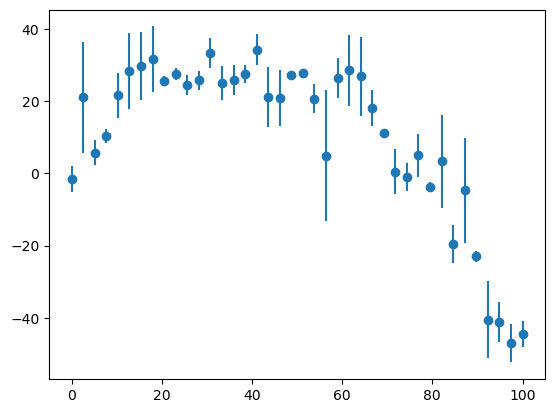

In [35]:
fig, ax = plt.subplots()

ax.errorbar(x, y, yerr=yerr, fmt="o")

Now let's do the fit of a parabola.  Along the way, we'll print out the condition number of the matrix ${\bf A}^\intercal{\bf A}$.

In [36]:
# do the regression with M = 3 (1, x, x^2)
M = 3
a, chisq = general_regression(x, y, yerr, M)

condition number of A^T A: 256697521.71262068


Notice that the condition number is quite large!

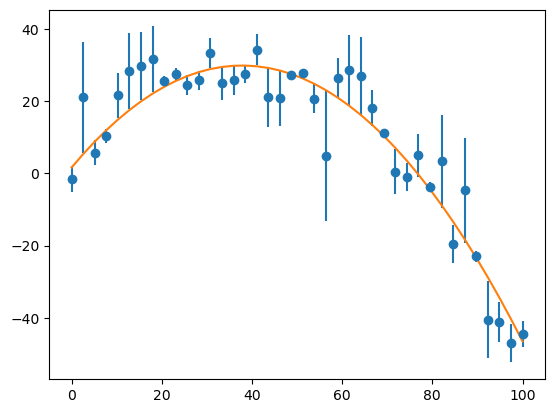

In [37]:
ax.plot(x, a[0] + a[1]*x + a[2]*x*x)
fig

## Higher order fit

condition number of A^T A: 4.960435393496687e+33


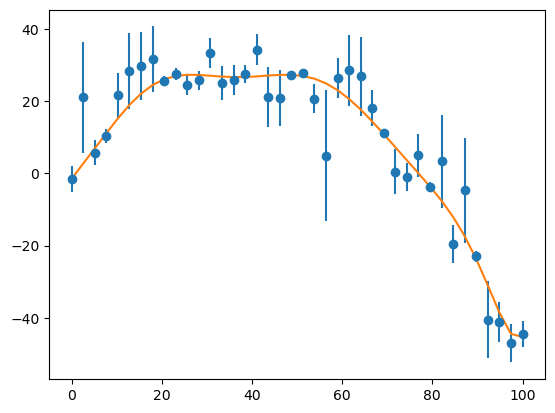

In [38]:
fig, ax = plt.subplots()
M = 10
a, chisq = general_regression(x, y, yerr, M)
yfit = np.zeros((len(x)), dtype=x.dtype)
for i in range(N):
    base = basis(x[i], M)
    yfit[i] = np.sum(a*base)

ax.errorbar(x, y, yerr=yerr, fmt="o")
ax.plot(x, yfit)

The $M = 10$ polynomial fits, but the condition number is large.  It is not clear that going higher order here is wise.

## Fitting and condition number

It can be shown that if your basis function is orthonormal in the interval you are fitting over, then the condition number of the matrix ${\bf A}^\intercal {\bf A}$ will be much lower.  For example, it we fit to the interval $[-1, 1]$, then the [Legendre polynomials](https://en.wikipedia.org/wiki/Legendre_polynomials) are a good basis.

The text by Yakowitz & Szidarovszky has a good discussion on this.

## Errors in the fitting parameters

It can also be shown that the errors in the fitting parameters are:

$$\sigma_{a_j} = \sqrt{C_{jj}}$$

where

$${\bf C} = ({\bf A}^\intercal {\bf A})^{-1}$$

is the _covariance matrix_.